# Cross-Entropy 2D Optimisation (Beta Distribution)

### Copyright 2016, Maria Kovaleva, David Bulger. Macquarie University. All rights reserved.  
### Adapted & extended from MATLAB to Python/Jupyter by Liam Ryan 2020.

2D optimisation algorithm using the [Cross-Entropy Method](https://en.wikipedia.org/wiki/Cross-entropy_method).
Data is iteratively fitted to a [Beta Distribution](https://en.wikipedia.org/wiki/Beta_distribution) in the algorithm. CE Parameters and the [fitness function](https://en.wikipedia.org/wiki/Fitness_function) can easily be changed. Based off the work of Dr. Maria Kovaleva and Dr. David Bulger, particularly in their paper "[Comparative study of optimization algorithms on the design of broadband antennas](https://doi.org/10.1109/JMMCT.2020.3000563)". 

Obtain this program as a .py file [here](https://github.com/LDRyan0/2D-Cross-Entropy-Optimisation), which allows user to step through generations and is more optimised.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import beta


### Set the design parameters here

In [3]:
x_range = (-5, 5)
y_range = (-5, 5)

### Set Cross Entropy parameters here
(Learn more about the [Cross Entropy Method](https://en.wikipedia.org/wiki/Cross-entropy_method)).

In [4]:
genSize = 30 # generation size
qElite = 10 # elite size (inclusive)
smoothing = 0.5 # smoothing parameter
fBestAntenna = -100000 # initial best
N_it = 15 # number of iterations

### Set fitness function here f(x,y)
(Learn more about [fitness functions](https://en.wikipedia.org/wiki/Fitness_function#:~:text=A%20fitness%20function%20is%20a,simulations%20towards%20optimal%20design%20solutions.))

 If you are unfamiliar with Python, look [here](https://www.w3schools.com/python/module_math.asp) for the syntax of standard mathematical functions in Python. Click [here](https://www.sfu.ca/~ssurjano/optimization.html) for more optimisation test problems.

In [5]:
def func(x,y):
    # Booth's
    # return -(np.square(x+2*y-7)+np.square(2*x+y-5))
    # Ackley's
    return -(-20*math.exp(-0.2*math.sqrt(0.5*(x**2+y**2)))-math.exp(0.5*(math.cos(2*math.pi*x)+math.cos(2*math.pi*y)))+20+math.exp(1))

### Execution of CE Optimisation Algorithm

Generation 1
	 Best point (x,y) = (0.5822865285047261,0.41587541600469957)
	     Best fitness = -4.14856566485771
	  Average fitness = -9.675494554094115
	(alpha x, beta x) = (4.829551425871539,4.9324789606171775)
	(alpha y, beta y) = (3.954515010704732,5.475170308074183)

Generation 2
	 Best point (x,y) = (0.5002672702470397,0.5879961816757725)
	     Best fitness = -2.685143059963423
	  Average fitness = -6.743788778135508
	(alpha x, beta x) = (7.204589598282659,7.737876338464773)
	(alpha y, beta y) = (7.680142205809163,7.665949315682616)

Generation 3
	 Best point (x,y) = (0.5071282911622541,0.48963235193637983)
	     Best fitness = -0.7353391253841726
	  Average fitness = -5.758057418952793
	(alpha x, beta x) = (24.08964546093615,24.558998789716263)
	(alpha y, beta y) = (16.54045160993017,16.537363352323624)

Generation 4
	 Best point (x,y) = (0.5071282911622541,0.48963235193637983)
	     Best fitness = -0.7353391253841726
	  Average fitness = -4.321831152864993
	(alpha x, beta x) =

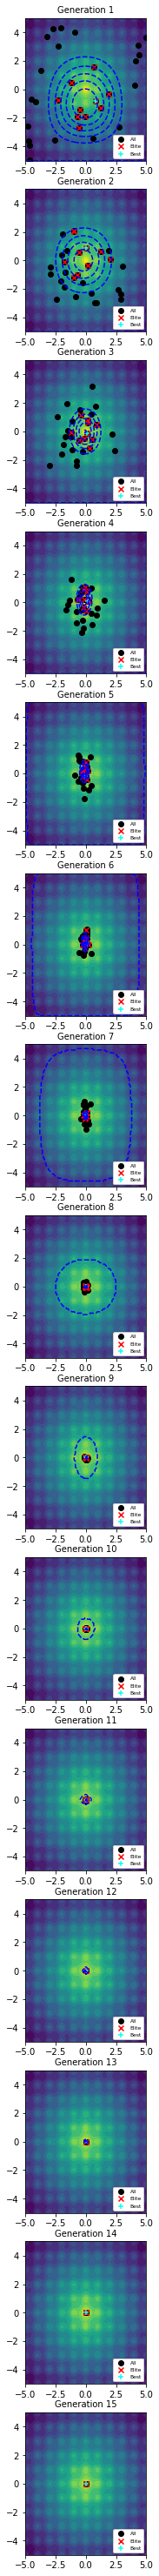

In [6]:
# Creating arrays to hold fitness information over generations
average_fitness_plot = np.zeros(N_it)
fBestAntenna_plot = np.zeros(N_it)

# Setting initial beta distribution parameters
beta_alpha = np.ones((2,1)) # x and y values for alpha
beta_beta = np.ones((2,1)) # x and y values for beta

# Creating x and y vectors
x_vec = np.linspace(x_range[0], x_range[1], 100)
y_vec = np.linspace(y_range[0], y_range[1], 100) 

# Creating and formatting the subplots
samp_fig, axs = plt.subplots(N_it, figsize=(2.5, 3*N_it))
plt.subplots_adjust(top=1, bottom=0.1)

## Start Cross-Entropy Optimization Algorithm
for i in range(N_it):
    x_loc = i // (N_it - N_it // 2)
    y_loc = i % (N_it - N_it // 2)
    
    # Obtaining function values using specified function
    # Can be optimised using vectorisation (see .py file) but decreases ease
    #       of use in creating a custom function which is the primary purpose 
    #       of this Jupyter Notebook
    f = np.empty((np.size(x_vec), np.size(y_vec)))
    for ii in range(np.size(x_vec)):
        for jj in range(np.size(y_vec)):
            f[jj,ii] = func(x_vec[ii], y_vec[jj])

    axs[i].contourf(x_vec, y_vec, f, 20) # adding contour plot to main image
    
    #  Sample 'x' and 'y' from the beta-distribution
    # The goal is to create a vector of size (1,genSize)  
    beta_alpha_r = np.tile(beta_alpha, genSize)
    beta_beta_r = np.tile(beta_beta, genSize)
    
    # Sample from beta distribution
    x = np.random.beta(beta_alpha_r[0,:], beta_beta_r[0,:])
    x_real = x * (x_range[1]-x_range[0]) + x_range[0] 
    y = np.random.beta(beta_alpha_r[1,:], beta_beta_r[1,:])
    y_real = y * (y_range[1]-y_range[0]) + y_range[0]

    # Fitness evaluation - Here is your Goal Function
    fitness = np.zeros(genSize)
    for j in range(genSize):
        fitness[j] = func(x_real[j],y_real[j]) # previously defined function

    # After fitness evaulation is done, we sort the best parameters (quicksort...O(n*logn))
    # More efficient implementation possible
    sortOrder = np.argsort(fitness)[::-1] # reverse array for descending order
    fitness = np.sort(fitness)[::-1] # reverse array for descending order

    # only take qElite number of the total generation
    sortOrder = sortOrder[0:qElite]

    # the elite, in descending order of fitness:
    elite_x = x[sortOrder]
    elite_x_real = x_real[sortOrder]
    elite_y = y[sortOrder]
    elite_y_real = y_real[sortOrder]

    # has this generation produced a new best antenna?
    if fitness[0] > fBestAntenna:
        fBestAntenna = fitness[0]
        best_x = elite_x[0]
        best_y = elite_y[0]
    
    # keep track of best & average fitness for the plot
    average_fitness_plot[i] = np.mean(fitness)
    fBestAntenna_plot[i] = fBestAntenna

    # update beta distribution parameters
    if i < N_it: # don't bother in the last generation
        xa, xb, xloc, xscale = beta.fit(elite_x , floc=0, fscale=1) 
        ya, yb, yloc, yscale = beta.fit(elite_y, floc=0, fscale=1)
        new_beta_alpha = np.array([[xa], [ya]]) # column vector of alpha values (x,y)
        new_beta_beta = np.array([[xb], [yb]]) # column vector of beta values (x,y)

        # Smoothing is optional (defined in a conventional way)
        beta_alpha = beta_alpha + smoothing*(new_beta_alpha-beta_alpha)
        beta_beta = beta_beta + smoothing*(new_beta_beta-beta_beta)
    
    # create x and y beta distributions
    dist_x = beta.pdf(x_vec, beta_alpha[0,0], beta_beta[0,0], loc=x_range[0], scale=(x_range[1]-x_range[0]))
    dist_y = beta.pdf(y_vec, beta_alpha[1,0], beta_beta[1,0], loc=y_range[0], scale=(y_range[1]-y_range[0]))

    # create 2D array to store 2D distribution values for plot
    d = np.outer(dist_y, dist_x)
    
    # sampling results visualisation
    axs[i].set_title('Generation ' + str(i+1), fontsize=10)
    sa = axs[i].scatter(x_real, y_real, c='#000000') # all
    se = axs[i].scatter(elite_x_real, elite_y_real, c='#ff0000', marker='x') # elite
    sb = axs[i].scatter(elite_x_real[0], elite_y_real[0], c='#11FFEE', marker='+') # best
    dist = axs[i].legend((sa, se, sb), ('All', 'Elite', 'Best'), fontsize=6, framealpha=1,
        loc='lower right') # add the legend
    axs[i].contour(x_vec, y_vec, d, 5 , colors='blue', linestyles='dashed')  

    # Give terminal output of the results of the current generation
    print("Generation " + str(i+1))
    print("\t Best point (x,y) = ({},{})".format(best_x, best_y))
    print("\t     Best fitness = " + str(fBestAntenna))
    print("\t  Average fitness = " + str(np.mean(fitness)))
    print("\t(alpha x, beta x) = ({},{})".format(beta_alpha[0,0], beta_beta[0,0]))
    print("\t(alpha y, beta y) = ({},{})\n".format(beta_alpha[1,0], beta_beta[1,0]))

### Final Results


FINAL RESULTS
	Best point (x,y) = (0.4999985748910632, 0.5000029534600066)
	    Best fitness = -9.278147505087375e-05



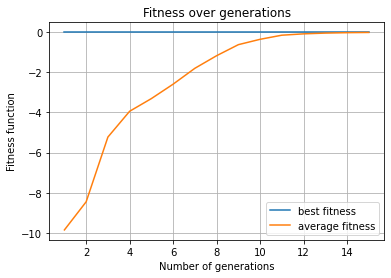

In [20]:
# plot the results
fit_fig, fit_ax = plt.subplots()
fit_ax.plot(np.arange(1, N_it+1), fBestAntenna_plot)
fit_ax.plot(np.arange(1, N_it+1), average_fitness_plot)
fit_ax.set_title('Fitness over generations')
fit_ax.set_xlabel('Number of generations')
fit_ax.set_ylabel('Fitness function')
fit_ax.legend(['best fitness', 'average fitness'])
fit_ax.grid()

# output the best x and y value, corresponding fitness
print("FINAL RESULTS")
print("\tBest point (x,y) = ({}, {})".format(best_x, best_y))
print("\t    Best fitness = {}\n".format(fBestAntenna))